### Install Gtrellis and ComplexHeatmap (if need be)

In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite("gtrellis")
biocLite("ComplexHeatmap")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) 'gtrellis'


package 'gtrellis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbece\AppData\Local\Temp\RtmpqAKZYK\downloaded_packages


Old packages: 'BH', 'bindr', 'bindrcpp', 'bit', 'blob', 'broom', 'callr',
  'car', 'caret', 'clipr', 'cluster', 'config', 'curl', 'CVST', 'data.table',
  'DBI', 'dbplyr', 'ddalpha', 'digest', 'dplyr', 'DRR', 'forcats', 'foreign',
  'ggplot2', 'gistr', 'glmnet', 'haven', 'hexbin', 'highr', 'hms',
  'htmlwidgets', 'httpuv', 'IRdisplay', 'iterators', 'kernlab', 'knitr',
  'lava', 'lme4', 'lubridate', 'maps', 'MASS', 'Matrix', 'mgcv', 'miniUI',
  'modelr', 'mongolite', 'munsell', 'nlme', 'odbc', 'openssl', 'packrat',
  'pbdZMQ', 'pillar', 'plogr', 'prodlim', 'profvis', 'pryr', 'psych', 'purrr',
  'quantmod', 'quantreg', 'randomForest', 'Rcpp', 'RcppEigen', 'RcppRoll',
  'RCurl', 'readxl', 'recipes', 'repr', 'reprex', 'rJava', 'RJDBC', 'rlang',
  'rmarkdown', 'robustbase', 'rpart', 'rprojroot', 'rsconnect', 'selectr',
  'sfsmisc', 'shiny', 'sourcetools', 'sparklyr', 'stringi', 'stringr',
  'survival', 'tibble', 'tidyr', 'tidyselect', 'timeDate', 'TTR', 'utf8',
  'viridisLite', 'withr', 'xml

package 'ComplexHeatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bbece\AppData\Local\Temp\RtmpqAKZYK\downloaded_packages


Old packages: 'BH', 'bindr', 'bindrcpp', 'bit', 'blob', 'broom', 'callr',
  'car', 'caret', 'clipr', 'cluster', 'config', 'curl', 'CVST', 'data.table',
  'DBI', 'dbplyr', 'ddalpha', 'digest', 'dplyr', 'DRR', 'forcats', 'foreign',
  'ggplot2', 'gistr', 'glmnet', 'haven', 'hexbin', 'highr', 'hms',
  'htmlwidgets', 'httpuv', 'IRdisplay', 'iterators', 'kernlab', 'knitr',
  'lava', 'lme4', 'lubridate', 'maps', 'MASS', 'Matrix', 'mgcv', 'miniUI',
  'modelr', 'mongolite', 'munsell', 'nlme', 'odbc', 'openssl', 'packrat',
  'pbdZMQ', 'pillar', 'plogr', 'prodlim', 'profvis', 'pryr', 'psych', 'purrr',
  'quantmod', 'quantreg', 'randomForest', 'Rcpp', 'RcppEigen', 'RcppRoll',
  'RCurl', 'readxl', 'recipes', 'repr', 'reprex', 'rJava', 'RJDBC', 'rlang',
  'rmarkdown', 'robustbase', 'rpart', 'rprojroot', 'rsconnect', 'selectr',
  'sfsmisc', 'shiny', 'sourcetools', 'sparklyr', 'stringi', 'stringr',
  'survival', 'tibble', 'tidyr', 'tidyselect', 'timeDate', 'TTR', 'utf8',
  'viridisLite', 'withr', 'xml

### Install source libraries

* __cnProfileVisualizationLibrary.R__ - contains visualization methods
* __helperFunctions.R__ - contains utility methods


In [9]:
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
source("cnProfileVisualizationLibrary.R")
source("helperFunctions.R")

### Determine sample to display CN profile

* Place sample to visualize below 

TODO: Show hN instead - but need to generate clusters for hN

In [10]:
sample <- "hN30"

### Load sample data to display

* Code below will load the sample's SNP data and segment data
* FACETS is the tool use to subsample the organoid's SNP, calculate the SNP's logR and logOR, and segmentize the sample data

In [11]:
setwd("~/Documents")
facets_segment_data_raw <- retrieveFacetsSegments(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_segment_data <- segmentsToBedFormat(facets_segment_data_raw)  
facets_segment_clusters_data <- segmentsToBedFormat(facets_segment_data_raw, median.clust = TRUE)

facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)

setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
facets_segment_clusters <- retrieveFacetsSegmentClusters(sample, dir = "segClusteringResults/prev_run1/")
facets_segment_clusters <- segmentClustersToBedFormat(facets_segment_clusters)

[1] "C:/Users/bbece/Documents"


### Visualize whole CN profile for normal sample
* Visualize the CN profile for all chromosome
* Here, we are visualizing the _cnlr_ for each SNP (black dots), and the _cnlr.median_ for each segment

For the most part, we see a relatively stable CN profile for the normal sample. Although we do seem to see artifacts in chromosome 19.

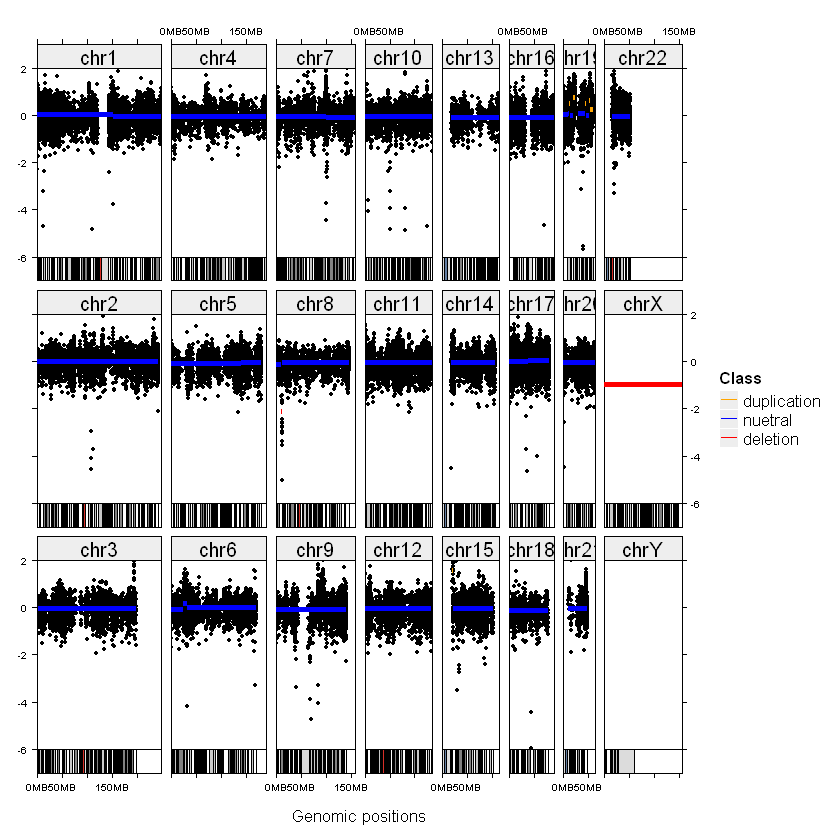

In [21]:
sample <- "hN30"
setwd("~/Documents")
facets_segment_data_raw <- retrieveFacetsSegments(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_segment_data <- segmentsToBedFormat(facets_segment_data_raw)
facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)
visualizeCNProfile(facets_segment_data = facets_segment_data, facets_snp_data = facets_snp_data)

### Visualize CN profile for chromosome 19 of human normal organoid
* Visualize the CN profile for chr19
* Here, we are visualizing the _cnlr_ for each SNP (black dots), and the _cnlr.median_ for each segment in chromosome 19

We can see several artifacts in chromosome 19. This may be due to biological aberration events in the organoid. Although this is most likely due to some structural variation events in the NA12878 reference genome.

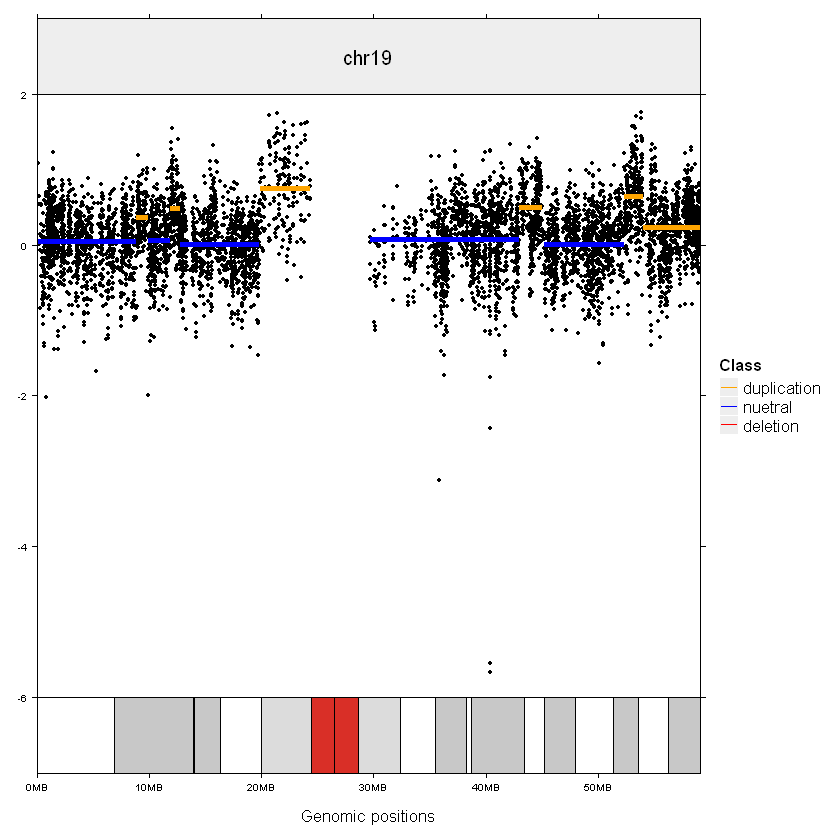

In [13]:
sample <- "hN30"
setwd("~/Documents")
facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)
facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)
visualizeCNProfile(facets_segment_data = facets_segment_data, facets_snp_data = facets_snp_data, categories = "chr19")

## Visualize CN profile for chromosome 19 from FACETS segment clusters

* Visualize the CN profile for chr19
* Here, we are visualizing the _cnlr_ for each SNP (black dots), and the _maxzmean_ for each segment __cluster__ in chromosome 19
* The _maxzmean_ is calculated from CNprep::CNpreprocessing method, which uses a GMM to model the cluster components. See the GMM visualization notebook for more details

Here are running a small verification of the CNprep segment clustering. We can see that some of the artifacts of chromosome 19 has smoothen. Although, this may be an issue since the segments that were clustered may have been significantly different to be two different copy number events

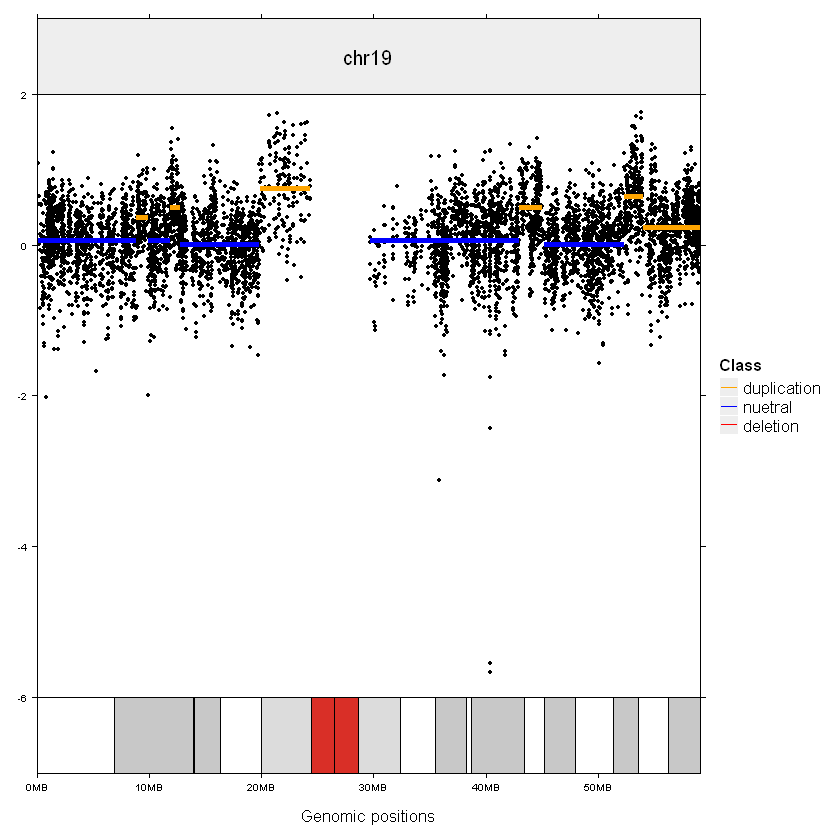

In [22]:
sample <- "hN30"
setwd("~/Documents")
facets_segment_data_raw <- retrieveFacetsSegments(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_segment_clusters_data <- segmentsToBedFormat(facets_segment_data_raw, median.clust = TRUE)
facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)
visualizeCNProfile(facets_segment_data = facets_segment_clusters_data, facets_snp_data = facets_snp_data, categories = "chr19")

### Visualize whole CN profile for tumor sample
* Visualize the CN profile for all chromosome
* Here, we are visualizing the _cnlr_ for each SNP (black dots), and the _cnlr.median_ for each segment

For the tumor sample, we see clear aberration events (i.e. deletion at 4, 8p, 9, 12, etc.)


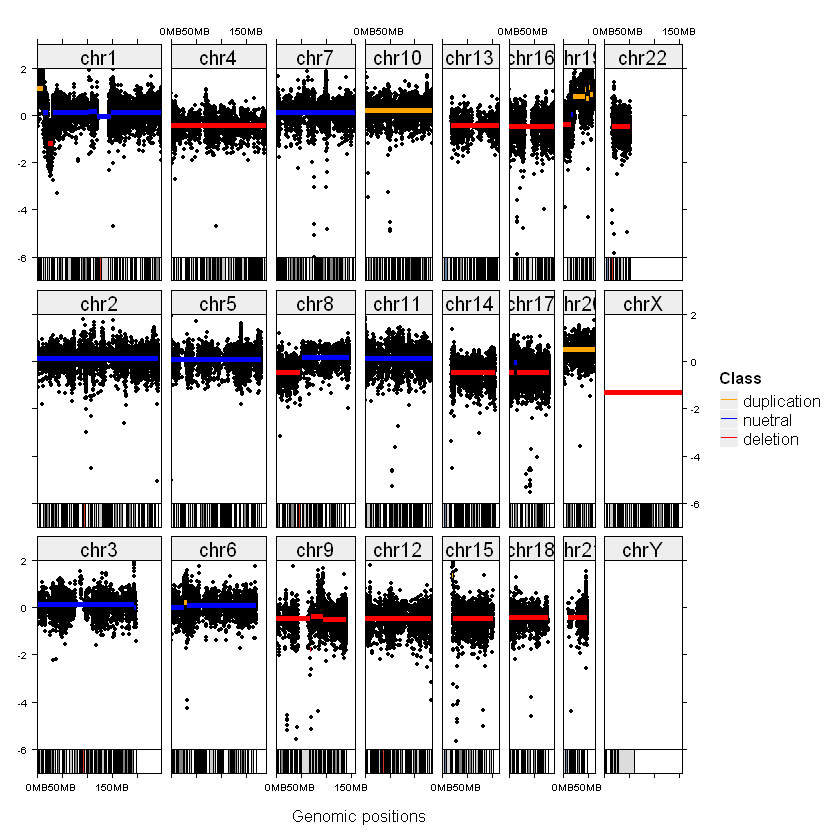

In [29]:
sample <- "hT30"
setwd("~/Documents")
facets_segment_data_raw <- retrieveFacetsSegments(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_segment_data <- segmentsToBedFormat(facets_segment_data_raw)
facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)
visualizeCNProfile(facets_segment_data = facets_segment_data, facets_snp_data = facets_snp_data)

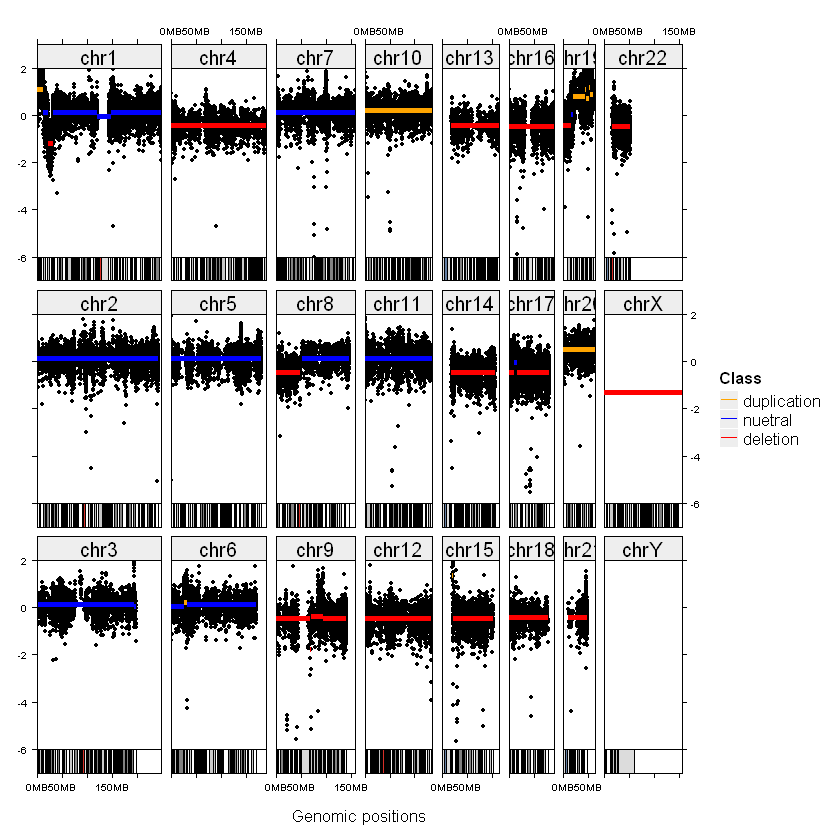

In [27]:
sample <- "hT30"
setwd("~/Documents")
facets_segment_data_raw <- retrieveFacetsSegments(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_segment_clusters_data <- segmentsToBedFormat(facets_segment_data_raw, median.clust = TRUE)
facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)
visualizeCNProfile(facets_segment_data = facets_segment_clusters_data, facets_snp_data = facets_snp_data)

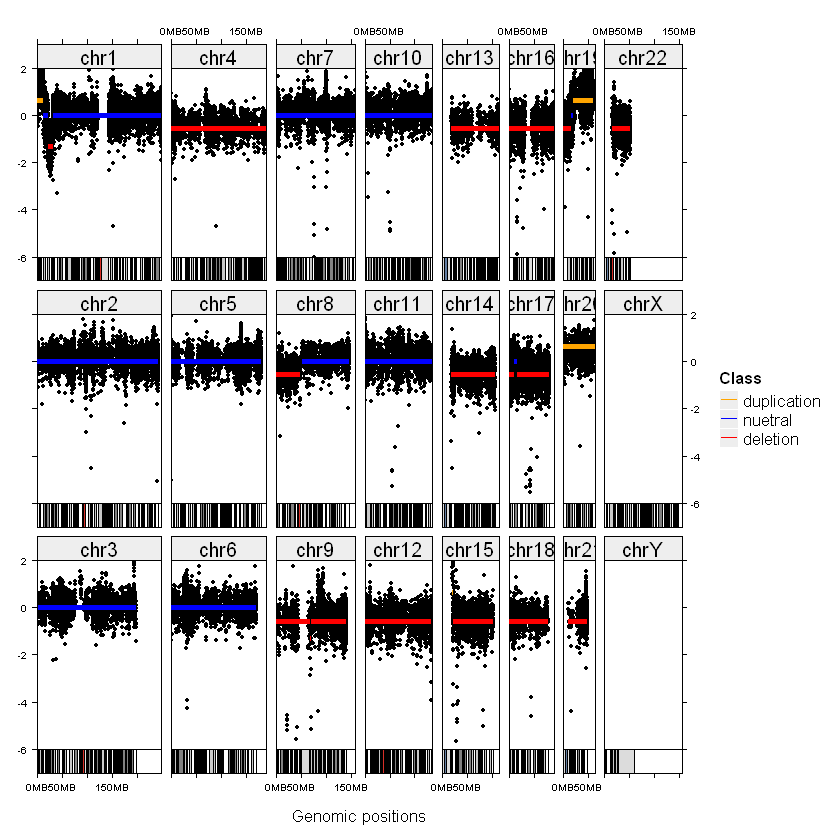

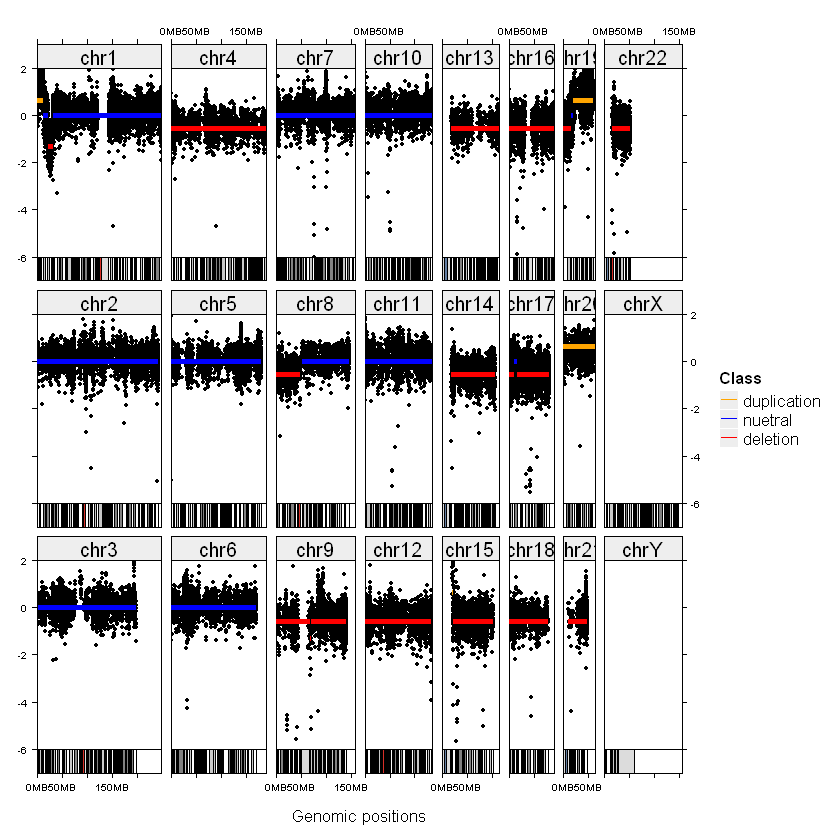

In [31]:
sample <- "hT30"
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
facets_segment_clusters_raw <- retrieveFacetsSegmentClusters(sample, dir = "segClusteringResults/prev_run1/")
facets_segment_clusters <- segmentClustersToBedFormat(facets_segment_clusters_raw)
setwd("~/Documents")
facets_snp_data_raw <- retrieveFacetsSnps(sample, dir = "CSHL/Project_TUV_12995_B01_SOM_Targeted.2018-03-02/")
facets_snp_data <- snpsToBedFormat(facets_snp_data_raw)
visualizeCNProfile(facets_segment_data = facets_segment_clusters, facets_snp_data = facets_snp_data)